# Analysing Elexon Datasets

## 2025 Generation by Source data

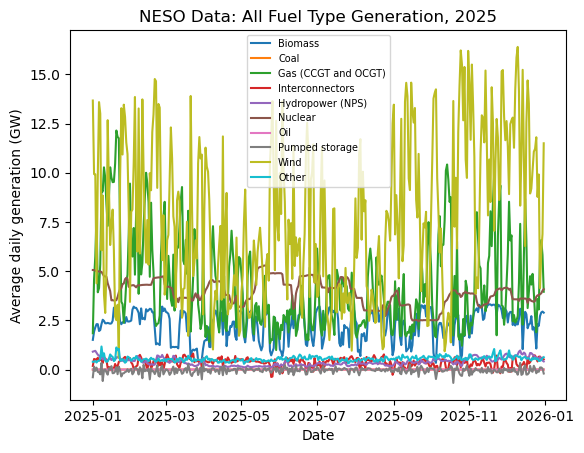

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# sorting the dataset by correct chronological order
df = pd.read_csv("Gen2025.csv", skiprows=[2, 21]) 
df["PublishTime"] = pd.to_datetime(df["PublishTime"])


# isolating the fuel types

# interconnectors: putting all interconnector names into a list to get a valid .isin() argument
inter_fuel_type=["INTELEC","INTEW","INTFR", "INTGRNL", "INTFA2", "INTNED","INTNEM", "INTNSL", "INTVKL"] 

biomass_df = df[df["FuelType"]=="BIOMASS"]
coal_df = df[df["FuelType"]=="COAL"]
gas_df = df[df["FuelType"].isin(["CCGT", "OCGT"])]
inter_df = df[df["FuelType"].isin(inter_fuel_type)]
hydro_df = df[df["FuelType"]=="NPSHYD"]
nuc_df=df[df["FuelType"]=="NUCLEAR"]
oil_df=df[df["FuelType"]=="OIL"]
ps_df=df[df["FuelType"]=="PS"]
wind_df=df[df["FuelType"]=="WIND"]
other_df=df[df["FuelType"]=="OTHER"]


# averaging the settlement periods into a daily average 
biomass_daily = ( biomass_df.set_index("PublishTime").resample("D")["Generation"].mean())
gas_daily = (gas_df.set_index("PublishTime").resample("D")["Generation"].mean())
coal_daily = (coal_df.set_index("PublishTime").resample("D")["Generation"].mean())
inter_daily = (inter_df.set_index("PublishTime").resample("D")["Generation"].mean())
hydro_daily = ( hydro_df.set_index("PublishTime").resample("D")["Generation"].mean())
nuc_daily=(nuc_df.set_index("PublishTime").resample("D")["Generation"].mean())
oil_daily=(oil_df.set_index("PublishTime").resample("D")["Generation"].mean())
ps_daily=(ps_df.set_index("PublishTime").resample("D")["Generation"].mean())
wind_daily=(wind_df.set_index("PublishTime").resample("D")["Generation"].mean())
other_daily=(other_df.set_index("PublishTime").resample("D")["Generation"].mean())


plt.figure()
plt.plot(biomass_daily.index, biomass_daily.values/1000, label='Biomass')
plt.plot(coal_daily.index, coal_daily.values/1000, label='Coal')
plt.plot(gas_daily.index, gas_daily.values/1000, label='Gas (CCGT and OCGT)')
plt.plot(inter_daily.index, inter_daily.values/1000, label='Interconnectors')
plt.plot(hydro_daily.index, hydro_daily.values/1000, label='Hydropower (NPS)')
plt.plot(nuc_daily.index, nuc_daily.values/1000, label='Nuclear')
plt.plot(oil_daily.index, oil_daily.values/1000, label='Oil')
plt.plot(ps_daily.index, ps_daily.values/1000, label='Pumped storage')
plt.plot(wind_daily.index, wind_daily.values/1000, label='Wind')
plt.plot(other_daily.index, other_daily.values/1000, label='Other')
plt.xlabel("Date")
plt.ylabel("Average daily generation (GW)")
plt.title("NESO Data: All Fuel Type Generation, 2025")
plt.legend(fontsize="7")
plt.show()



Text(0, 0.5, 'Daily average generation (GW)')

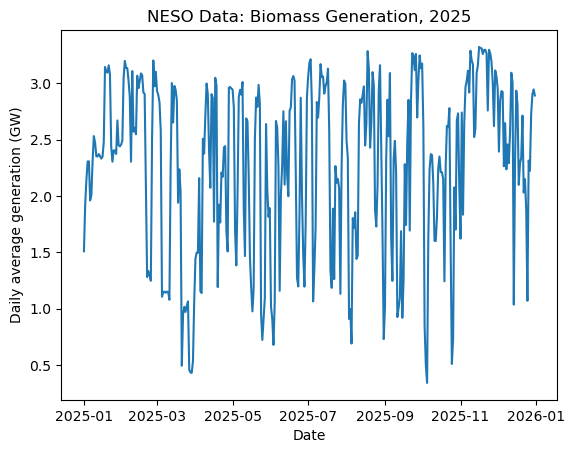

In [92]:
x = biomass_daily.index
y = biomass_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Biomass Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")




Text(0, 0.5, 'Daily average generation (GW)')

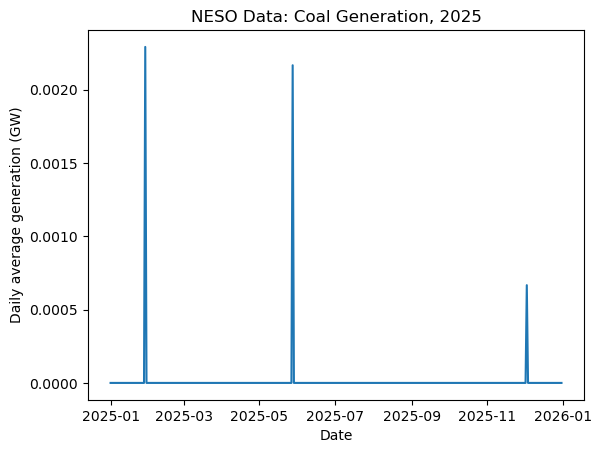

In [93]:
x1 = coal_daily.index
y1 = coal_daily.values/1000

plt.plot(x1,y1)
plt.title("NESO Data: Coal Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

Text(0, 0.5, 'Daily average generation (GW)')

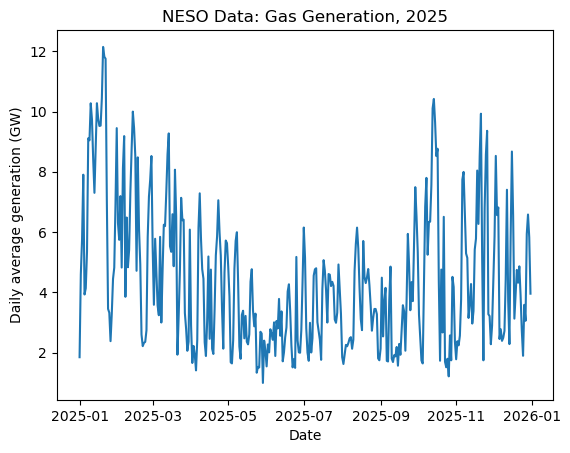

In [89]:
x = gas_daily.index
y = gas_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Gas Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

Text(0, 0.5, 'Daily average generation (GW)')

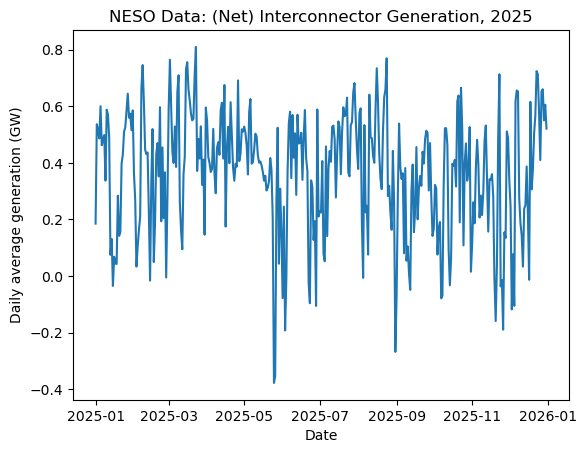

In [94]:
x = inter_daily.index
y = inter_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: (Net) Interconnector Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

Text(0, 0.5, 'Daily average generation (GW)')

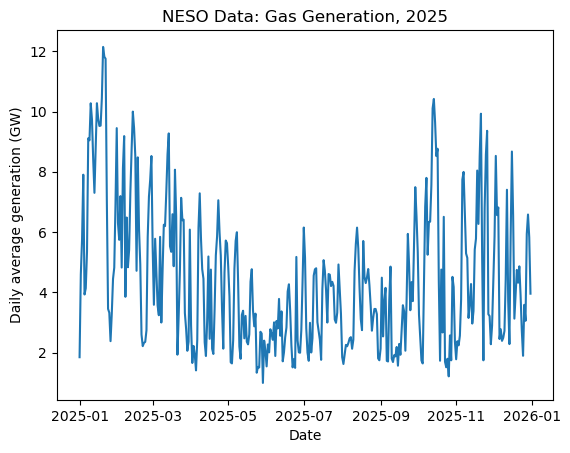

In [95]:
x = gas_daily.index
y = gas_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Gas Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

Text(0, 0.5, 'Daily average generation (GW)')

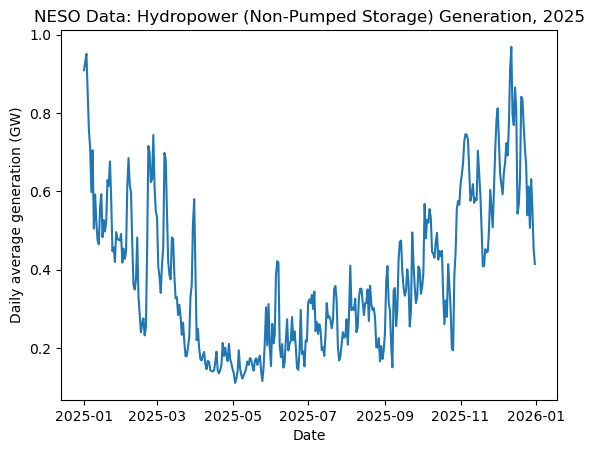

In [97]:
x = hydro_daily.index
y = hydro_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Hydropower (Non-Pumped Storage) Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

Text(0, 0.5, 'Daily average generation (GW)')

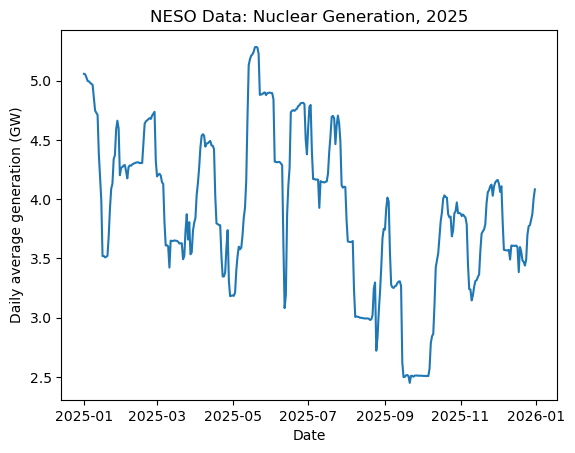

In [98]:
x = nuc_daily.index
y = nuc_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Nuclear Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

Text(0, 0.5, 'Daily average generation (GW)')

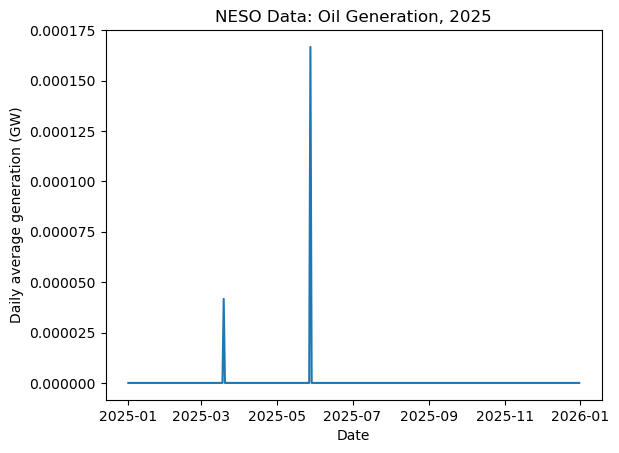

In [99]:
x = oil_daily.index
y = oil_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Oil Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

Text(0, 0.5, 'Daily average generation (GW)')

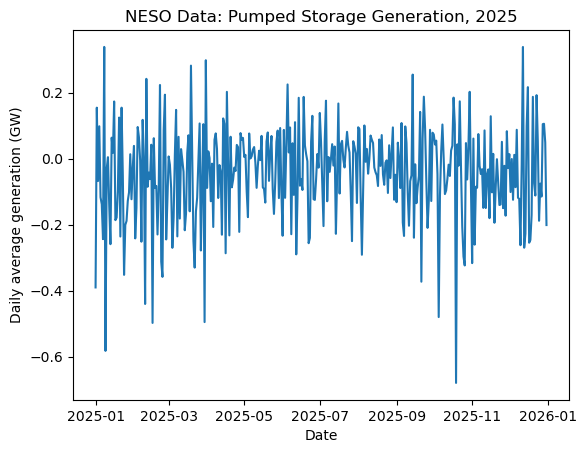

In [100]:
x = ps_daily.index
y = ps_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Pumped Storage Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

In [101]:
x = wind_daily.index
y = wind_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: Wind Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")

Text(0, 0.5, 'Daily average generation (GW)')

<Figure size 640x480 with 1 Axes>

In [ ]:
x = other_daily.index
y = other_daily.values/1000

plt.plot(x,y)
plt.title("NESO Data: 'Other' Generation, 2025")
plt.xlabel("Date")
plt.ylabel("Daily average generation (GW)")